#Média Móvel

##Importar Libs

In [12]:
import pandas as pd                     #Manipulações de DataFrames e Séries
import numpy as np                      #Manipulações Matemáticas
import plotly.express as px             #Criação de Gráficos Interativos
import matplotlib.pyplot as plt         #Manipulações Gráficas
from matplotlib.pylab import rcParams   #Manipulação de parâmetros do matplotlib

Ajustar Tamanho dos gráficos (Maior Horizontalmente)

In [8]:
rcParams['figure.figsize'] = 12, 6

##Criação da Série

Desvios da temperatura média global da terra-oceano (com referência a média 1951-1980), medidos em graus Celsius, para os anos de 1880-2015

In [10]:
temperatura = pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/temp_global.csv')
temperatura.columns = ['desvio_temp']
temperatura.head()

,desvio_temp
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28


Criar índice

In [7]:
indice = pd.date_range('1880 Jan 1', periods=len(temperatura), freq='Y')

Cria Série

In [11]:
serie = pd.Series(temperatura['desvio_temp'].values, index = indice)

##Plotagem do Gráfico Interativo

In [14]:
fig = px.line(x = serie.index, y = serie)

#Adicionados Títulos
fig.update_layout(title='Desvio da Temperatura Média de 1880 à 2015',
                  xaxis_title='Anos',
                  yaxis_title='Valores')

fig.show()

##Criação da Média Móvel Simples

###Período de Referência (3 anos)

Função reutilizavel para criação de Média Móvel e plotagem da mesma

In [33]:
def CriarMediaMovel(serie, periodo, center=False):
  media_movel = serie.rolling(window = periodo, center = center)
  media_movel = media_movel.mean()

  plt.plot(media_movel)
  plt.show()
  return media_movel

Criação da Média Móvel

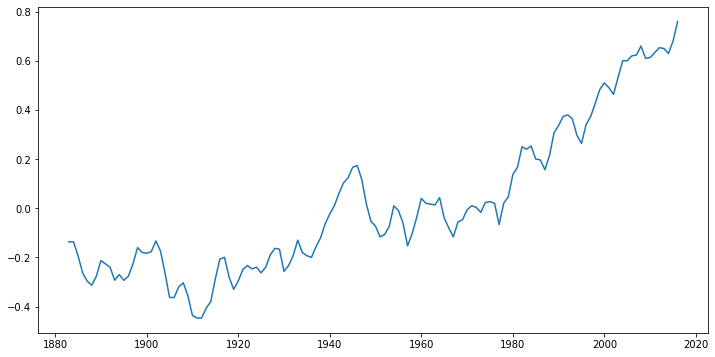

In [23]:
media_movel1 = CriarMediaMovel(serie, 3)

Função Reutilizável para plotagem de Comparações

In [20]:
def GraficoComparacaoMedia(serieOriginal, mediaMovel, legendaMedia):
  plt.plot(serieOriginal, label = 'Série Real')
  plt.plot(mediaMovel, color = 'red', label = f'Média Móvel {legendaMedia}')
  plt.title(f'Comparação da Série Original com a Média Móvel de {legendaMedia}')
  plt.xlabel('Anos')
  plt.ylabel('Valores')
  plt.legend(loc='best')
  plt.show()

Comparar Séries

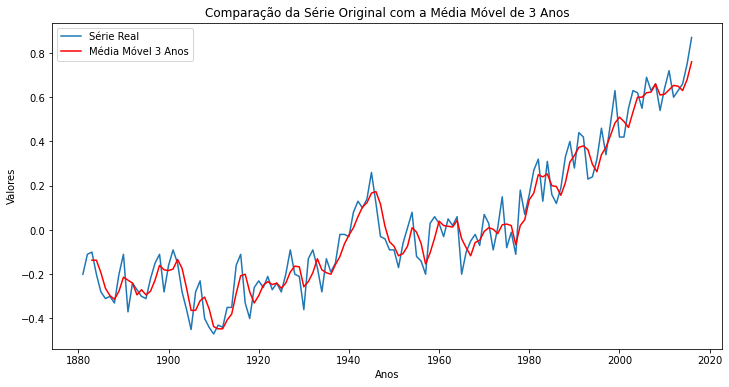

In [21]:
GraficoComparacaoMedia(serie, media_movel1, '3 Anos')

OBS: Observe a suavização feita pela média móvel Simples na série original para dar enfâse na tendência.

###Período de Referência (10 anos)

Criação da Média Móvel

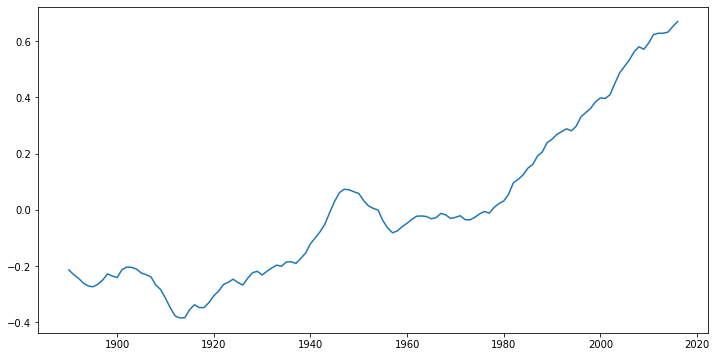

In [25]:
media_movel2 = CriarMediaMovel(serie, 10)

Comparação

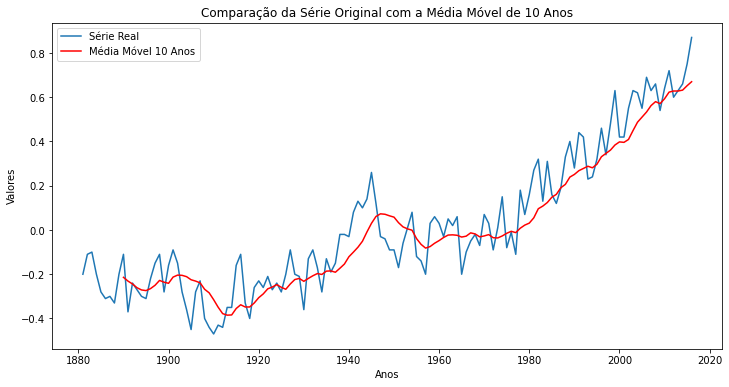

In [27]:
GraficoComparacaoMedia(serie, media_movel2,'10 Anos')

###Período de Referência (20 anos)

Criação da Média Móvel

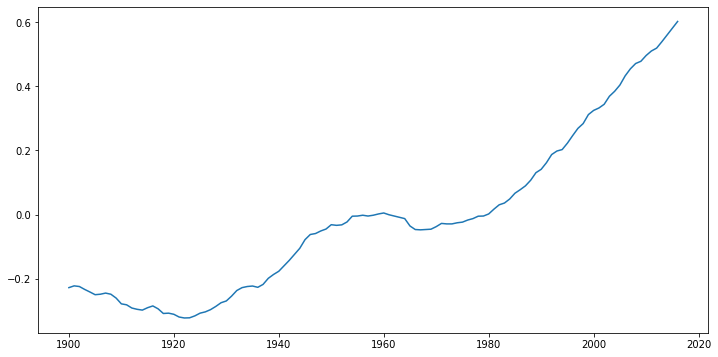

In [28]:
media_movel3 = CriarMediaMovel(serie, 20)

Comparação

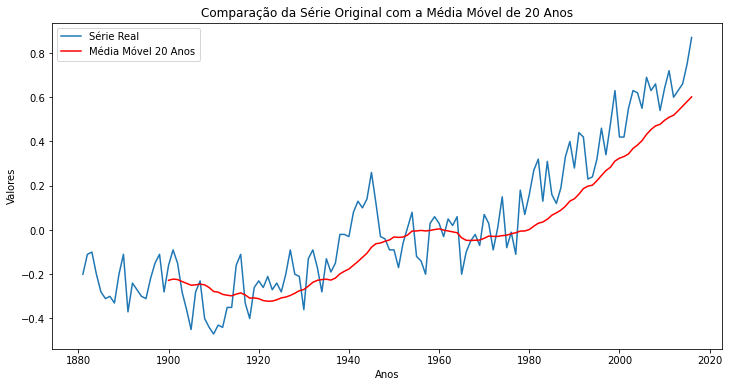

In [29]:
GraficoComparacaoMedia(serie, media_movel3, '20 Anos')

###Comparação de todos os Resultados

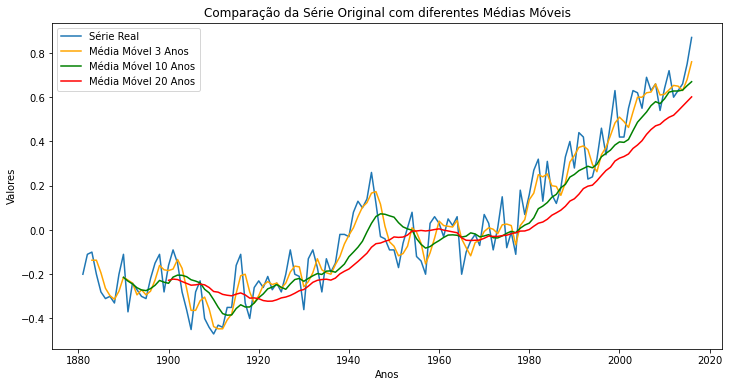

In [32]:
plt.plot(serie, label = 'Série Real')
plt.plot(media_movel1, color = 'orange', label = 'Média Móvel 3 Anos')
plt.plot(media_movel2, color = 'green', label = 'Média Móvel 10 Anos')
plt.plot(media_movel3, color = 'red', label = 'Média Móvel 20 Anos')
plt.title(f'Comparação da Série Original com diferentes Médias Móveis')
plt.xlabel('Anos')
plt.ylabel('Valores')
plt.legend(loc='best')
plt.show()

**OBS:** Observe que quanto maior a janela, mais dados são perdidos no início da série, porém, a tendência tende a ficar mais evidente devido à suavização (remoção das oscilações).

##Criação da Média Móvel Centralizada

###Período de Referência (3 anos)

Criação da Média Móvel

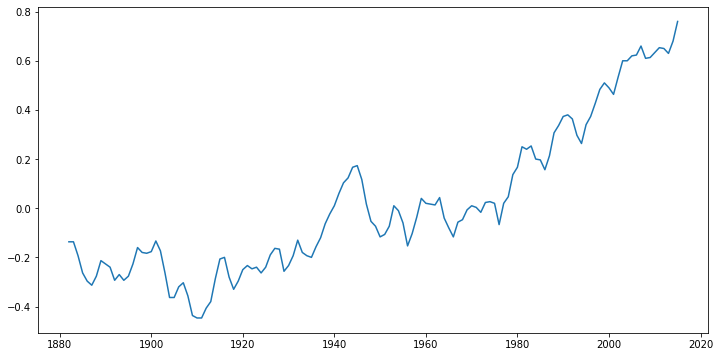

In [34]:
media_movel4 = CriarMediaMovel(serie, 3, True)

###Período de Referência (10 anos)

Criação da Média Móvel

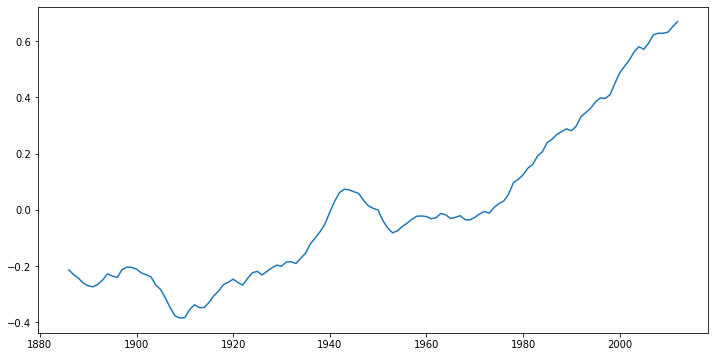

In [35]:
media_movel5 = CriarMediaMovel(serie, 10, True)

###Período de Referência (20 anos)

Criação da Média Móvel

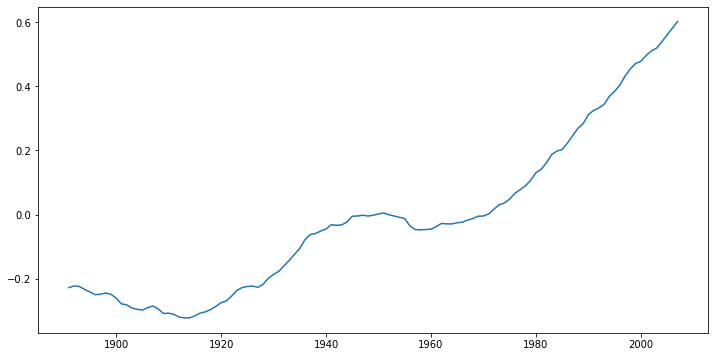

In [36]:
media_movel6 = CriarMediaMovel(serie, 20, True)

###Comparar Todos os Resultados

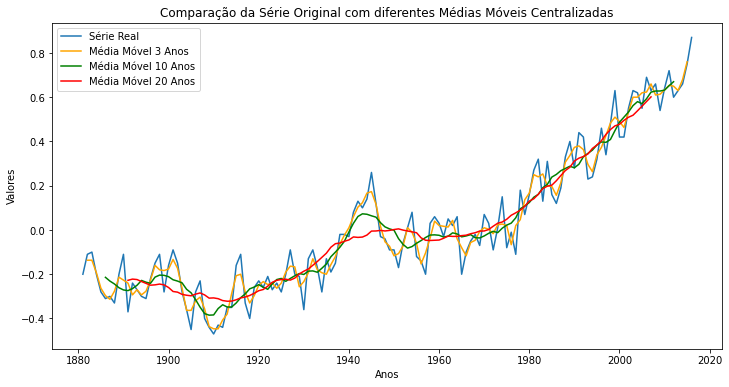

In [39]:
plt.plot(serie, label = 'Série Real')
plt.plot(media_movel4, color = 'orange', label = 'Média Móvel 3 Anos')
plt.plot(media_movel5, color = 'green', label = 'Média Móvel 10 Anos')
plt.plot(media_movel6, color = 'red', label = 'Média Móvel 20 Anos')
plt.title(f'Comparação da Série Original com diferentes Médias Móveis Centralizadas')
plt.xlabel('Anos')
plt.ylabel('Valores')
plt.legend(loc='best')
plt.show()

**OBS:** Observe que todas as médias móveis centralizadas tendem a perder parte da série no ínicio e no fim, mas os resultados de suavização foram melhores que a da Média Móvel Simples. 